In [68]:
import matplotlib.pyplot as plt
import numpy as np

The one-dimensional Schrödinger equation in atomic units ($m=1$, $\hbar=1$) is
\begin{equation}
\left[-\frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}x^2} + V(x) \right]u(x) = E u(x).
\end{equation}
We will assume that the potential is symmetric, i.e. $V(x) = V(-x)$, and we look for the wave functions $u_n$ and energies $E_n$ that correspond to bound states.

The **Numerov algorithm** is based on a discretization of the second derivative. To this end, we introduce a real-space grid $x_i = h \times i$ with the spacing $h$ between neighboring grid points. The wave function at $x_i$ is denoted by $u_i$. One obtains a recursion formla which allows us to calculate $u_{i+1}$ from $u_{i}$ and $u_{i-1}$. Knowing $u_0 = u(0)$ and $u_1 = u(h)$, we can compute the wave function at all other grid points. The recursion formula is
\begin{equation}
    u_{i+1} = \frac{2 u_i - u_{i-1} - \frac{h^2}{12} (10 F_i u_i + F_{i-1} u_{i-1}) }{1 + \frac{h^2}{12} F_{i+1}},
\end{equation}
with $F_i = F(x_i)$ and $F(x) = 2(E-V(x))$.

This can be implemented as follows:

In [69]:
def numerov_forward(u0, um, F0, Fm, Fp, h):
    """Iterate the wave function u by one step.

    u0 -> u_i, um -> u_{i-1}, up -> u_{i+1}
    F0 -> F_i, Fm -> F_{i-1}, Fp -> F_{i+1}
    """
    up = 2 * u0 - um - (h**2 / 12) * (10 * F0 * u0 + Fm * um)
    up /= 1 + (h**2 / 12) * Fp
    return up

Since the potential is symmetric, we expect two types of solutions: gerade (symmetric or $u(x)=u(-x)$) and ungerade (anti-symmetric or $u(x)=-u(-x)$). For the former, we can set $u_0=u(0)=1$ and for the latter $u_0=0$. The value at $x_1=h$ needs some more consideration, but we will not derive it here. Once $u_0$ and $u_1$ are known we can use our recursion to find $u_i$ at the other grid points:

In [70]:
def numerov_solve(u, F, h, gerade=True):
    """Solve the TDSE for simple 1D potentials.

    The method assumes a symmetric potential profile.

    u (array): Wave function values at the grid points.
    F (array): Eff. potential, i.e., F = 2*(Etry-V).
    h (float): Step size.
    gerade (bool): Symmetry of the wave function.

    Returns (non-normalized) wave function values and number of nodes.
    """
    N = len(u)  # Number of grid points

    # Initialize the wave function at the origin according to the symmetry
    if gerade:
        u[0] = 1
        u[1] = (1 - 5 * h**2 / 12 * F[0]) / (1 + h**2 / 12 * F[1]) * u[0]
    else:
        u[0] = 0
        u[1] = h

    # Forward-iterate the wave function and count the number of nodes
    n_nodes = 0
    for i in range(1, N - 1):
        u[i + 1] = numerov_forward(u[i], u[i - 1], F[i], F[i - 1], F[i + 1], h)

        # If there is a node (a zero) between x_i=i*h and x_(i+1)=(i+1)*h,
        # the product of the wave functions is negative
        if u[i + 1] * u[i] < 0:
            n_nodes += 1
    return u, n_nodes

# Harmonic Oscillator part 1

Now we can apply this to a potential for which we know the solution: the harmonic oscillator potential (see for example https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)
\begin{equation}
    V(x) = \frac{1}{2} \omega^2 x^2.
\end{equation}
The eigenenergies are $E_n = \omega (n + \frac{1}{2})$ ($n=0,1,2,\ldots$) and the eigenfunctions are the Hermite functions.

In [71]:
# Input parameters
N = 500000  # Number of grid points
omega = 1  # Frequency of the harmonic potential
xmax = 5  # Extent of the grid

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]
# ...and the potential
V = 0.5 * omega**2 * xs**2  # Harmonic oscillator potential

tried E=0.6 got n_nodes=1


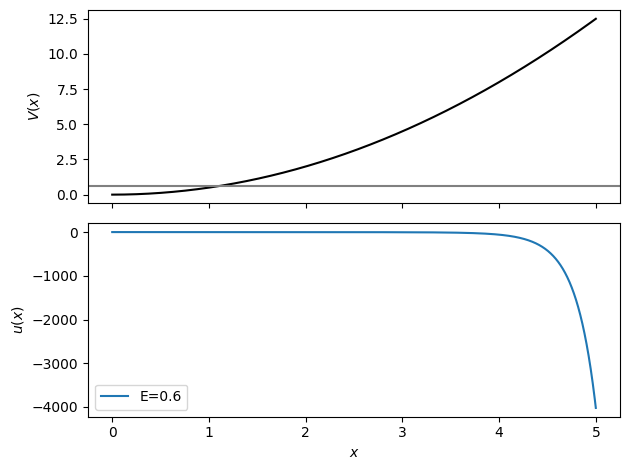

In [72]:
gerade = True
Etry = 0.6 

# Initialize wave function with zeros
u = np.zeros_like(V)
# Calculate eff. potential
F = 2 * (Etry - V)
# ...and apply the Numerov algorithm to find the wave function
u, n_nodes = numerov_solve(u, F, h, gerade=gerade)
print(f"tried E={Etry:.1f} got n_nodes={n_nodes}")

# Plot results
fix, axs = plt.subplots(2, 1, sharex=True)

# ...first the potential
axs[0].plot(xs, V, color="black")
axs[0].axhline(y=Etry, color="grey")
axs[0].set_ylabel(r"$V(x)$")

# ...and then the wave function
axs[1].plot(xs, u, label=f"E={Etry:.1f}")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$u(x)$")

plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Try</b> to run the calculation with different values for `Etry` (e.g. $0.4$ and $0.6$). What do you observe?
</div>

- 0.4: monotoneously increasing, no nodes
- 0.6: monotoneously decreasing, one node

In [73]:
gerade = True

Etry_values = [0.3, 0.4, 0.5, 0.6, 0.7]

u_results = []
for Etry in Etry_values:
    # Initialize wave function with zeros
    u = np.zeros_like(V)
    # Calculate eff. potential
    F = 2 * (Etry - V)
    u, n_nodes = numerov_solve(u, F, h, gerade=True)
    u_results.append(u)
    print(f"tried E={Etry:.1f} got n_nodes={n_nodes}")

tried E=0.3 got n_nodes=0
tried E=0.4 got n_nodes=0
tried E=0.5 got n_nodes=1
tried E=0.6 got n_nodes=1
tried E=0.7 got n_nodes=1


Based on the observations above, we can formulate the Numerov algorithm (for symmetric potentials):
1. Specify the desired symmetry `gerade` and number of nodes `k`.
1. Start with a guess for the eigenenergy `Etry`.
1. Use the recursion formula to find the wavefunction and check the actual number of nodes
    - If the number of nodes is larger than `k`, then `Etry` is an upper bound for the eigenenergy.
    - If the wavefunction becomes very large, then `Etry` is a lower bound for the eigenenergy.
1. Depending on the type of bound we try with a lower/higher energy and repeat.

The actual implementation is a bit more complicated. It uses a forward and a backward recursion to avoid a numerical blow-up of the wavefunction. 

# Harmonic Oscillator part 2

Using a more complete implementation, we revisit the harmonic oscillator.

In [74]:
# Import the prepared functions
from numerov import solve_schroedinger, symmetric

In [75]:
# Input parameters
N = 500 # Number of grid points
omega = 1  # Frequency of the harmonic potential
xmax = 5  # Extent of the grid

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]
# ...and the potential
V = 0.5 * omega**2 * xs**2

In [76]:
k = 0 
gerade = True
Etry = 0.1

u, E, dE, n_nodes = solve_schroedinger(V, k, gerade, h, Etry=Etry)
print(f"tried E={Etry:.1f} got n_nodes={n_nodes} and E={E:.1f}")

tried E=0.1 got n_nodes=0 and E=0.5


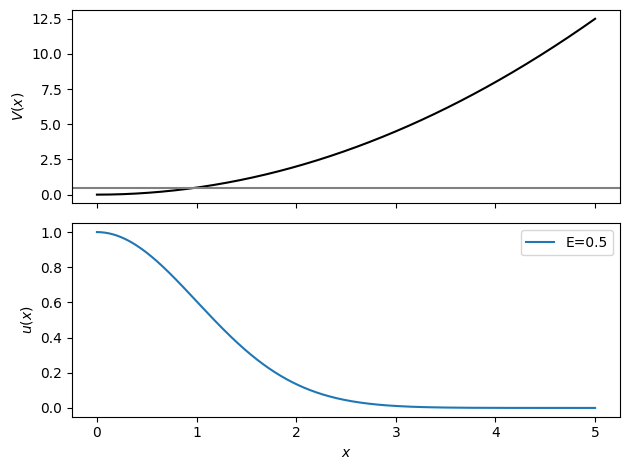

In [77]:
fix, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(xs, V, color="black")
axs[0].axhline(y=E, color="grey")
axs[0].set_ylabel(r"$V(x)$")

axs[1].plot(xs, u, label=f"E={E:.1f}")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$u(x)$")

plt.legend()
plt.tight_layout()
plt.show()

Since we know the symmetry of the wavefunction, we can extend it easily for negative $x$ values. To this end, we use the function `symmetric`. The wavefunction is not yet normalized. We can calculate the norm using the so-called trapzal rule (https://en.wikipedia.org/wiki/trapzal_rule)
\begin{equation}
    \mathbb{N}^2 = \int_{-x_{max}}^{x_{max}} \mathrm{d}x \psi(x)^2 \approx h\sum_{i=1}^N \psi(x_i)^2,
\end{equation}
which is implemented in numpy's `trapz` function.

In [78]:
# symmetric() extends u for a symmetric interval around 0 
xg = symmetric(xs, gerade=False)  # Do you see that the function x is ungerade?

u, E0, dE, n_nodes = solve_schroedinger(V, k=0, gerade=True, h=h, Etry=0.1)
print(n_nodes)
psi0 = symmetric(u, gerade=True)
psi0 /= np.sqrt(np.trapezoid(psi0 * psi0, dx=h))

u, E1, dE, n_nodes = solve_schroedinger(V, k=0, gerade=False, h=h, Etry=0.1)
print(n_nodes)
psi1 = symmetric(u, gerade=False)
psi1 /= np.sqrt(np.trapezoid(psi1 * psi1, dx=h))

u, E2, dE, n_nodes = solve_schroedinger(V, k=1, gerade=True, h=h, Etry=0.1)
print(n_nodes)
psi2 = symmetric(u, gerade=True)
psi2 /= np.sqrt(np.trapezoid(psi2 * psi2, dx=h))

u, E3, dE, n_nodes = solve_schroedinger(V, k=1, gerade=False, h=h, Etry=0.1)
print(n_nodes)
psi3 = symmetric(u, gerade=False)
psi3 /= np.sqrt(np.trapezoid(psi3 * psi3, dx=h))

0
0
1
1


<div class="alert alert-block alert-info">
<b>Check</b> that the wavefunctions psi0, psi1, psi2, psi3 are indeed normalized.
</div>

In [79]:
wfs = [psi0, psi1, psi2, psi3]
for wf in wfs:
    print(np.trapezoid(wf *wf, dx=h))

1.0
1.0
1.0
1.0


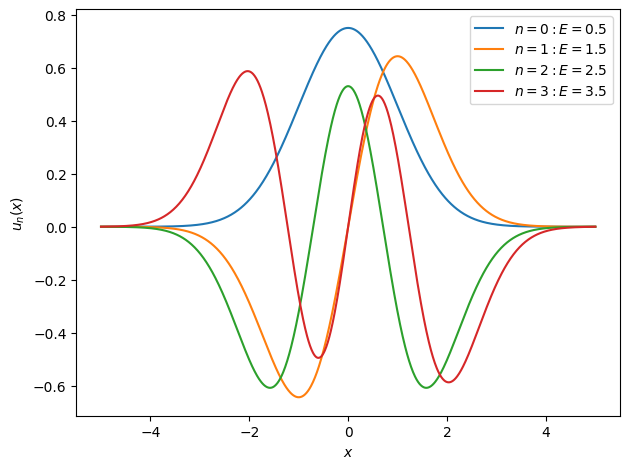

In [80]:
fix, axs = plt.subplots(1, 1)

# Plot the wave functions
axs.plot(xg, psi0, label=f"$n=0: E={E0:.1f}$")
axs.plot(xg, psi1, label=f"$n=1: E={E1:.1f}$")
axs.plot(xg, psi2, label=f"$n=2: E={E2:.1f}$")
axs.plot(xg, psi3, label=f"$n=3: E={E3:.1f}$")
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$u_n(x)$")

plt.legend()
plt.tight_layout()
plt.show()

# Double-well potential

Next, we look into the double-well potential which can be seen as a very simplified model for $H_2$. The potential in this case can be written as follows
\begin{equation}
    V(x) = -\lambda x^2 + x^4.
\end{equation}
The potential has a maximum at $x=0$ (with $V(0)=0$) and two minima at $x=\pm\sqrt{\frac{\lambda}{2}}$ (with $V\left(\pm\sqrt{\frac{\lambda}{2}}\right)=-\frac{\lambda^2}{4}$). The parameter $\lambda$ controls the positions and the depths of the wells.

In [81]:
# Input parameters
N = 50000  # Number of grid points
xmax = 5  # Extent of the grid
lambd = 4  # Double-well parameter

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]
# ...and the potential
V = -lambd * xs**2 + xs**4  # Double-well potential

In [82]:
# Let's look at some state as before
k = 1
gerade = True 
Etry = 0

u, E, dE, n_nodes = solve_schroedinger(V, k, gerade, h, Etry=Etry)
print(f"tried E={Etry:.1f} got n_nodes={n_nodes} and E={E:.1f}")

tried E=0.0 got n_nodes=1 and E=0.4


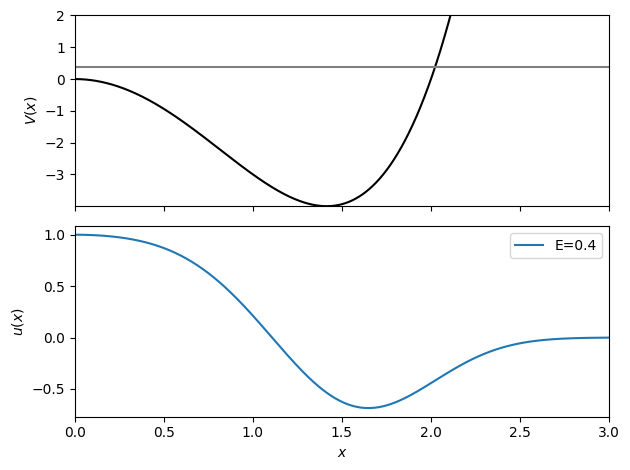

In [83]:
fix, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(xs, V, color="black")
axs[0].axhline(y=E, color="grey")
axs[0].set_ylabel(r"$V(x)$")
axs[0].set_xlim((0, 3))
axs[0].set_ylim((V.min(), 2))

axs[1].plot(xs, u, label=f"E={E:.1f}")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$u(x)$")

plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Have</b> a look also at other states and also change the parameter $\lambda$ in the potential. What do you conclude?
</div>

## for lambda = 4
- gerade, 0 nodes: E = -2.2
- ungerade, 1 node: E = 1.6

In [84]:
# As before, we want to extend the wave functions to the whole x-axis and normalize them
xg = symmetric(xs, gerade=False)

# Here, we only look at the first two
u, E0, dE, n_nodes = solve_schroedinger(V, k=0, gerade=True, h=h, Etry=0.1)
psi0 = symmetric(u, gerade=True)
psi0 /= np.sqrt(np.trapezoid(psi0 * psi0, dx=h))

u, E1, dE, n_nodes = solve_schroedinger(V, k=0, gerade=False, h=h, Etry=0.1)
psi1 = symmetric(u, gerade=False)
psi1 /= np.sqrt(np.trapezoid(psi1 * psi1, dx=h))

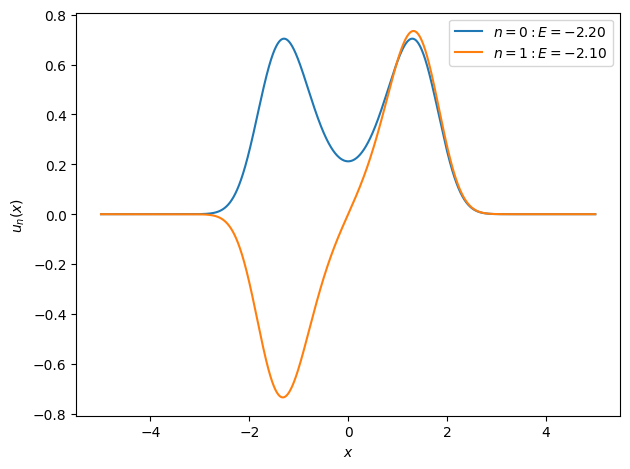

In [85]:
fix, axs = plt.subplots(1, 1)

# Plot the wave functions
axs.plot(xg, psi0, label=f"$n=0: E={E0:4.2f}$")
axs.plot(xg, psi1, label=f"$n=1: E={E1:4.2f}$")
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$u_n(x)$")

plt.legend()
plt.tight_layout()
plt.show()

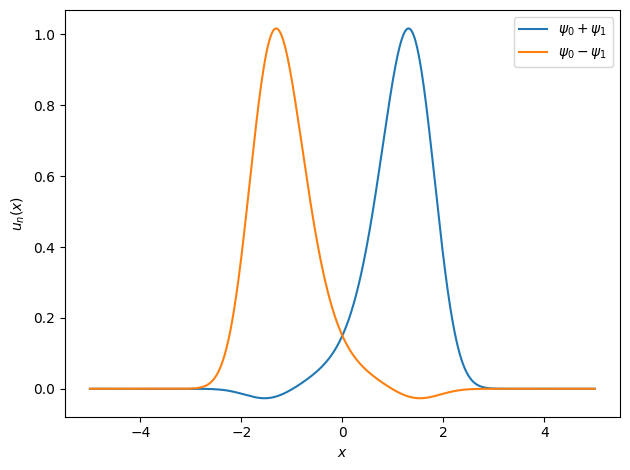

In [86]:
psi_plus = (psi0 + psi1) / np.sqrt(2)
psi_minus = (psi0 - psi1) / np.sqrt(2)

fix, axs = plt.subplots(1, 1)

# Plot the wave functions
axs.plot(xg, psi_plus, label=r"$\psi_0 + \psi_1$")
axs.plot(xg, psi_minus, label=r"$\psi_0 - \psi_1$")

axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$u_n(x)$")

plt.legend()
plt.tight_layout()
plt.show()